In [1]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np
from sklearn.feature_selection import SelectKBest

/Users/jayantjalta/Documents/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
df=pd.read_csv('loan_data.csv')

In [3]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


# Preprocessing

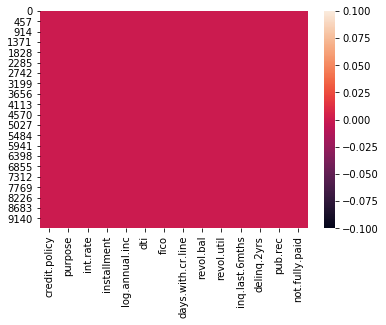

In [6]:
sns.heatmap(df.isnull())

# Exploratory Data Analysis

Plotting a historgram of two FICO distributions, one for each credit.policy outcome.

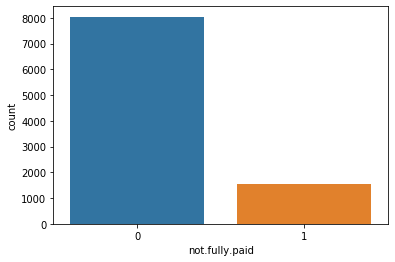

In [7]:
sns.countplot('not.fully.paid',data=df)


THE TARGET CLASS IS IMBALANCED

In [8]:
Not_paid = df[df['not.fully.paid']==1]

paid= df[df['not.fully.paid']==0]

In [9]:
print(Not_paid.shape,paid.shape)

(1533, 14) (8045, 14)


Text(0.5, 0, 'FICO')

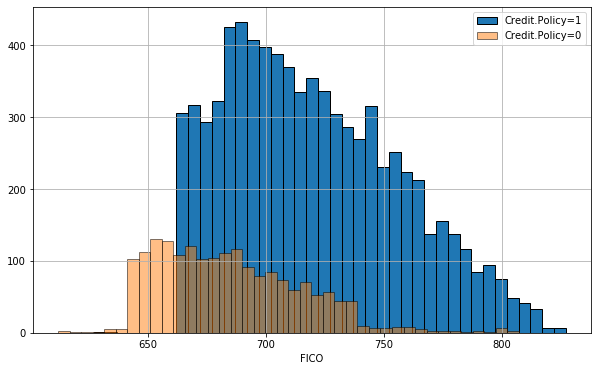

In [10]:
plt.figure(figsize=(10,6))
df[df['credit.policy']==1]['fico'].hist(bins=40,label='Credit.Policy=1',edgecolor='black')
df[df['credit.policy']==0]['fico'].hist(alpha=0.5,bins=40,label='Credit.Policy=0',edgecolor='black')
plt.legend()
plt.xlabel('FICO')




Clearly by looking at the graph we can see that it follows a logarithimic distribution with majority being the credit policy=1(meets the lending club loan criteria) and based on the fico score people having lower fico score are the ones haveing credit policy=0(they do not meet the criteria) which makes sense.


Text(0.5, 0, 'FICO')

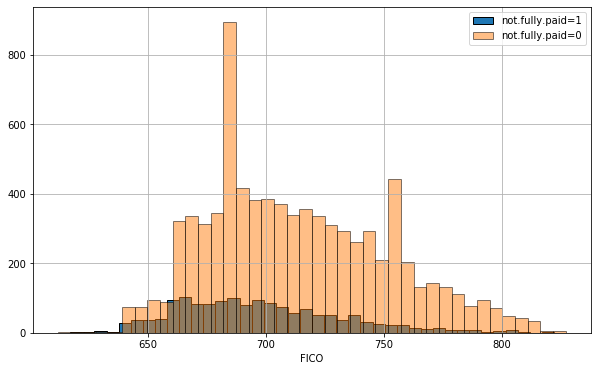

In [11]:
plt.figure(figsize=(10,6))
df[df['not.fully.paid']==1]['fico'].hist(bins=40,label='not.fully.paid=1',edgecolor='black')
df[df['not.fully.paid']==0]['fico'].hist(alpha=0.5,bins=40,label='not.fully.paid=0',edgecolor='black')
plt.legend()
plt.xlabel('FICO')

From the plot,it is seen that most of the people are paying off the loan, follows the same distribution as the previous one.
The Highest range of count lies between 675-720

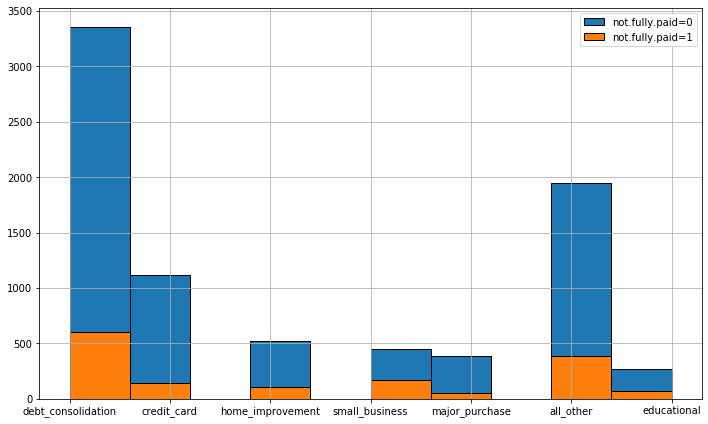

In [12]:
plt.figure(figsize=(10,6))
df[df['not.fully.paid']==0]['purpose'].hist(label='not.fully.paid=0',edgecolor='black')
df[df['not.fully.paid']==1]['purpose'].hist(label='not.fully.paid=1',edgecolor='black')
plt.legend()
plt.tight_layout()

Ratio between not fully paid and fully paid is almost same for all purposes.The highest number of loan required belong to debt consolidation.

<Figure size 576x432 with 0 Axes>

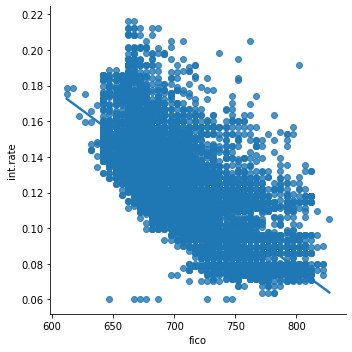

In [13]:
plt.figure(figsize=(8,6))
sns.lmplot(x='fico',y='int.rate',data=df)

From this graph one thing to note is that the interest rate drops as the fico score increases because of good credit history

# Modelling

Converting categorical variables

In [14]:
categorical=['purpose']

In [15]:
final_data=pd.get_dummies(df,columns=categorical,drop_first=True)

In [16]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

In [17]:
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [22]:
X=final_data.drop('not.fully.paid',axis=1)
y=final_data['not.fully.paid']

In [23]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X[['int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec']])

In [27]:
X_scaled=pd.DataFrame(X_scaled,columns=X.columns[1:12])

In [28]:
X=pd.concat([X_scaled,X[['credit.policy','purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_major_purchase',
       'purpose_small_business']]],axis=1)

In [29]:
X.head()

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,credit.policy,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,-0.139318,2.463099,0.680388,0.998505,0.688825,0.432230,0.353732,0.182704,-0.716989,-0.299730,-0.237003,1,0,1,0,0,0,0
1,-0.578868,-0.438854,0.244031,0.244540,-0.101303,-0.721230,0.495018,1.030602,-0.716989,-0.299730,-0.237003,1,1,0,0,0,0,0
2,0.486484,0.230708,-0.908659,-0.141885,-0.759742,0.059770,-0.397073,-0.730683,-0.262470,-0.299730,-0.237003,1,0,1,0,0,0,0
3,-0.813544,-0.757022,0.680388,-0.654697,0.030385,-0.745277,0.496321,0.909966,-0.262470,-0.299730,-0.237003,1,0,1,0,0,0,0
4,0.743509,-1.043992,0.597961,0.343326,-1.154806,-0.198161,-0.360663,-0.251586,-0.716989,1.531147,-0.237003,1,1,0,0,0,0,0


In [32]:
df_scaled=pd.concat([X,y],axis=1)

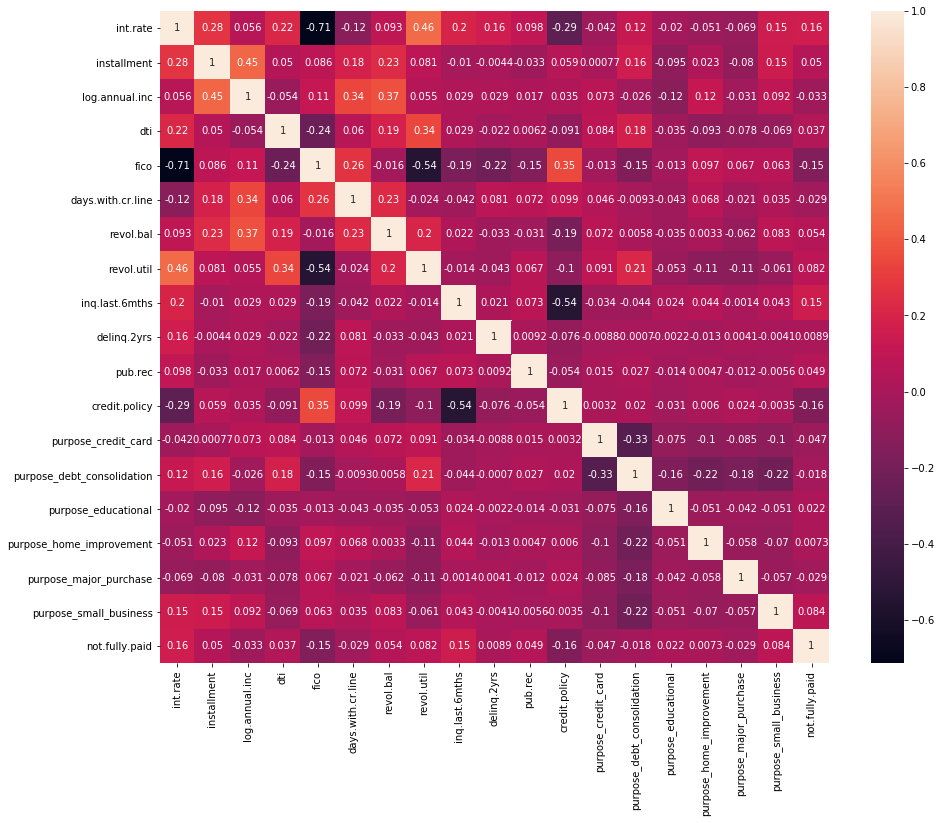

In [33]:
plt.figure(figsize=(15,12))
sns.heatmap(df_scaled.corr(),annot=True)

In [34]:
X=X[['fico','installment','inq.last.6mths']]

# USING STRATIFIEDKFOLD

In [37]:
from sklearn.model_selection import StratifiedKFold

In [38]:
skf=StratifiedKFold(n_splits=5,random_state=None)

# LOGISTIC

In [39]:
from sklearn.linear_model import LogisticRegression

In [91]:
accuracy=[]
skf.get_n_splits(X,y)
for train_index,test_index in skf.split(X,y):

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    log=LogisticRegression(penalty='l1',solver='liblinear')
    log.fit(X_train,y_train)
    log_preds=log.predict(X_test)
    score=accuracy_score(log_preds,y_test)
    accuracy.append(score)
    
print(accuracy)

[0.8397703549060542, 0.8397703549060542, 0.8397703549060542, 0.8412532637075718, 0.7347258485639687]


In [92]:
np.array(accuracy).mean()

0.8190580353979406

In [93]:
print(classification_report(y_test,log_preds))
print(confusion_matrix(y_test,log_preds))

              precision    recall  f1-score   support

           0       0.87      0.80      0.84      1609
           1       0.26      0.37      0.31       306

    accuracy                           0.73      1915
   macro avg       0.57      0.59      0.57      1915
weighted avg       0.77      0.73      0.75      1915

[[1295  314]
 [ 194  112]]


# SVM

In [43]:
from sklearn.svm import SVC


In [46]:
from sklearn.svm import SVC
accuracy_svm=[]
skf.get_n_splits(X,y)
for train_index,test_index in skf.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    svc=SVC()
    svc.fit(X_train,y_train)
    svc_preds=svc.predict(X_test)
    score=accuracy_score(svc_preds,y_test)
    accuracy_svm.append(score)
    
print(accuracy_svm)

[0.8397703549060542, 0.8397703549060542, 0.8397703549060542, 0.8402088772845953, 0.6746736292428198]


In [48]:
np.array(accuracy_svm).mean()

0.8068387142491155

In [49]:
print(classification_report(y_test,svc_preds))
print(confusion_matrix(y_test,svc_preds))

              precision    recall  f1-score   support

           0       0.87      0.72      0.79      1609
           1       0.23      0.45      0.31       306

    accuracy                           0.67      1915
   macro avg       0.55      0.59      0.55      1915
weighted avg       0.77      0.67      0.71      1915

[[1153  456]
 [ 167  139]]


TUNING

In [55]:
from sklearn.svm import SVC
accuracy_svm=[]
skf.get_n_splits(X,y)
for train_index,test_index in skf.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    svc=SVC(C=0.1,gamma=1)
    svc.fit(X_train,y_train)
    svc_preds=svc.predict(X_test)
    score=accuracy_score(svc_preds,y_test)
    accuracy_svm.append(score)
    
print(accuracy_svm)

[0.8397703549060542, 0.8397703549060542, 0.8397703549060542, 0.8402088772845953, 0.7509138381201045]


In [56]:
np.array(accuracy_svm).mean()

0.8220867560245724

In [57]:
print(classification_report(y_test,svc_preds))
print(confusion_matrix(y_test,svc_preds))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1609
           1       0.25      0.28      0.27       306

    accuracy                           0.75      1915
   macro avg       0.56      0.56      0.56      1915
weighted avg       0.76      0.75      0.76      1915

[[1351  258]
 [ 219   87]]


# Random Forest

In [71]:
accuracy_RF=[]
skf.get_n_splits(X,y)
for train_index,test_index in skf.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    RF=RandomForestClassifier(n_estimators=300,
 min_samples_split=2,
 min_samples_leaf=1,
 max_features='sqrt',
 max_depth=120,
 criterion='gini')
    RF.fit(X_train,y_train)
    RF_preds=RF.predict(X_test)
    score=accuracy_score(RF_preds,y_test)
    accuracy_RF.append(score)
    
print(accuracy_RF)

[0.7927974947807933, 0.7813152400835073, 0.7927974947807933, 0.7676240208877284, 0.425065274151436]


In [72]:
np.array(accuracy_RF).mean()

0.7119199049368516

In [73]:
print(classification_report(y_test,RF_preds))
print(confusion_matrix(y_test,RF_preds))

              precision    recall  f1-score   support

           0       0.91      0.35      0.51      1609
           1       0.19      0.81      0.31       306

    accuracy                           0.43      1915
   macro avg       0.55      0.58      0.41      1915
weighted avg       0.79      0.43      0.48      1915

[[ 566 1043]
 [  58  248]]


# BOOSTING

In [75]:
import xgboost as xgb
from xgboost import XGBClassifier

In [78]:
accuracy_XG=[]
skf.get_n_splits(X,y)
for train_index,test_index in skf.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    XG=XGBClassifier(objective='binary:logistic')
    XG.fit(X_train,y_train)
    XG_preds=XG.predict(X_test)
    score=accuracy_score(XG_preds,y_test)
    accuracy_XG.append(score)
    
print(accuracy_XG)

[0.8402922755741128, 0.8402922755741128, 0.8397703549060542, 0.8402088772845953, 0.4516971279373368]


In [79]:
np.array(accuracy_XG).mean()

0.7624521822552424

In [80]:

print(classification_report(y_test,XG_preds))

              precision    recall  f1-score   support

           0       0.91      0.39      0.54      1609
           1       0.20      0.80      0.32       306

    accuracy                           0.45      1915
   macro avg       0.55      0.59      0.43      1915
weighted avg       0.80      0.45      0.51      1915



TUNING

In [81]:
param_grid={
   
    ' learning_rate':[1,0.5,0.1,0.01,0.001],
    'max_depth': [3,5,10,20,50],
    'n_estimators':[10,50,100,200]
    
}

In [82]:
grid= GridSearchCV(XGBClassifier(objective='binary:logistic'),param_grid, verbose=3)

In [83]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=0.839, total=   0.0s
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=0.840, total=   0.0s
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=0.840, total=   0.0s
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=0.840, total=   0.0s
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=0.836, total=   0.0s
[CV]  learning_rate=1, max_depth=3, n_estimators=50 ..................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]   learning_rate=1, max_depth=3, n_estimators=50, score=0.839, total=   0.2s
[CV]  learning_rate=1, max_depth=3, n_estimators=50 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=50, score=0.840, total=   0.1s
[CV]  learning_rate=1, max_depth=3, n_estimators=50 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=50, score=0.840, total=   0.2s
[CV]  learning_rate=1, max_depth=3, n_estimators=50 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=50, score=0.840, total=   0.1s
[CV]  learning_rate=1, max_depth=3, n_estimators=50 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=50, score=0.839, total=   0.1s
[CV]  learning_rate=1, max_depth=3, n_estimators=100 .................
[CV]   learning_rate=1, max_depth=3, n_estimators=100, score=0.838, total=   0.3s
[CV]  learning_rate=1, max_depth=3, n_estimators=100 .................
[CV]   learning_rate=1, max_depth=3, n_estimators=100, score=0.840, total=   0.4s
[CV] 

[CV]   learning_rate=1, max_depth=10, n_estimators=200, score=0.828, total=   1.3s
[CV]  learning_rate=1, max_depth=20, n_estimators=10 .................
[CV]   learning_rate=1, max_depth=20, n_estimators=10, score=0.831, total=   0.1s
[CV]  learning_rate=1, max_depth=20, n_estimators=10 .................
[CV]   learning_rate=1, max_depth=20, n_estimators=10, score=0.825, total=   0.1s
[CV]  learning_rate=1, max_depth=20, n_estimators=10 .................
[CV]   learning_rate=1, max_depth=20, n_estimators=10, score=0.830, total=   0.1s
[CV]  learning_rate=1, max_depth=20, n_estimators=10 .................
[CV]   learning_rate=1, max_depth=20, n_estimators=10, score=0.832, total=   0.1s
[CV]  learning_rate=1, max_depth=20, n_estimators=10 .................
[CV]   learning_rate=1, max_depth=20, n_estimators=10, score=0.830, total=   0.1s
[CV]  learning_rate=1, max_depth=20, n_estimators=50 .................
[CV]   learning_rate=1, max_depth=20, n_estimators=50, score=0.825, total=   0.6s

[CV]   learning_rate=0.5, max_depth=3, n_estimators=100, score=0.839, total=   0.3s
[CV]  learning_rate=0.5, max_depth=3, n_estimators=100 ...............
[CV]   learning_rate=0.5, max_depth=3, n_estimators=100, score=0.837, total=   0.3s
[CV]  learning_rate=0.5, max_depth=3, n_estimators=200 ...............
[CV]   learning_rate=0.5, max_depth=3, n_estimators=200, score=0.838, total=   0.5s
[CV]  learning_rate=0.5, max_depth=3, n_estimators=200 ...............
[CV]   learning_rate=0.5, max_depth=3, n_estimators=200, score=0.840, total=   0.5s
[CV]  learning_rate=0.5, max_depth=3, n_estimators=200 ...............
[CV]   learning_rate=0.5, max_depth=3, n_estimators=200, score=0.839, total=   0.5s
[CV]  learning_rate=0.5, max_depth=3, n_estimators=200 ...............
[CV]   learning_rate=0.5, max_depth=3, n_estimators=200, score=0.837, total=   0.5s
[CV]  learning_rate=0.5, max_depth=3, n_estimators=200 ...............
[CV]   learning_rate=0.5, max_depth=3, n_estimators=200, score=0.837, 

[CV]   learning_rate=0.5, max_depth=20, n_estimators=50, score=0.819, total=   0.6s
[CV]  learning_rate=0.5, max_depth=20, n_estimators=50 ...............
[CV]   learning_rate=0.5, max_depth=20, n_estimators=50, score=0.825, total=   0.6s
[CV]  learning_rate=0.5, max_depth=20, n_estimators=50 ...............
[CV]   learning_rate=0.5, max_depth=20, n_estimators=50, score=0.828, total=   0.6s
[CV]  learning_rate=0.5, max_depth=20, n_estimators=50 ...............
[CV]   learning_rate=0.5, max_depth=20, n_estimators=50, score=0.828, total=   0.6s
[CV]  learning_rate=0.5, max_depth=20, n_estimators=100 ..............
[CV]   learning_rate=0.5, max_depth=20, n_estimators=100, score=0.821, total=   1.2s
[CV]  learning_rate=0.5, max_depth=20, n_estimators=100 ..............
[CV]   learning_rate=0.5, max_depth=20, n_estimators=100, score=0.810, total=   1.2s
[CV]  learning_rate=0.5, max_depth=20, n_estimators=100 ..............
[CV]   learning_rate=0.5, max_depth=20, n_estimators=100, score=0.81

[CV]   learning_rate=0.1, max_depth=3, n_estimators=200, score=0.837, total=   1.2s
[CV]  learning_rate=0.1, max_depth=5, n_estimators=10 ................
[CV]   learning_rate=0.1, max_depth=5, n_estimators=10, score=0.839, total=   0.1s
[CV]  learning_rate=0.1, max_depth=5, n_estimators=10 ................
[CV]   learning_rate=0.1, max_depth=5, n_estimators=10, score=0.838, total=   0.1s
[CV]  learning_rate=0.1, max_depth=5, n_estimators=10 ................
[CV]   learning_rate=0.1, max_depth=5, n_estimators=10, score=0.840, total=   0.0s
[CV]  learning_rate=0.1, max_depth=5, n_estimators=10 ................
[CV]   learning_rate=0.1, max_depth=5, n_estimators=10, score=0.839, total=   0.1s
[CV]  learning_rate=0.1, max_depth=5, n_estimators=10 ................
[CV]   learning_rate=0.1, max_depth=5, n_estimators=10, score=0.837, total=   0.0s
[CV]  learning_rate=0.1, max_depth=5, n_estimators=50 ................
[CV]   learning_rate=0.1, max_depth=5, n_estimators=50, score=0.838, total=

[CV]   learning_rate=0.1, max_depth=20, n_estimators=100, score=0.818, total=   1.2s
[CV]  learning_rate=0.1, max_depth=20, n_estimators=100 ..............
[CV]   learning_rate=0.1, max_depth=20, n_estimators=100, score=0.826, total=   1.2s
[CV]  learning_rate=0.1, max_depth=20, n_estimators=100 ..............
[CV]   learning_rate=0.1, max_depth=20, n_estimators=100, score=0.825, total=   1.2s
[CV]  learning_rate=0.1, max_depth=20, n_estimators=200 ..............
[CV]   learning_rate=0.1, max_depth=20, n_estimators=200, score=0.819, total=   2.3s
[CV]  learning_rate=0.1, max_depth=20, n_estimators=200 ..............
[CV]   learning_rate=0.1, max_depth=20, n_estimators=200, score=0.802, total=   2.4s
[CV]  learning_rate=0.1, max_depth=20, n_estimators=200 ..............
[CV]   learning_rate=0.1, max_depth=20, n_estimators=200, score=0.811, total=   2.4s
[CV]  learning_rate=0.1, max_depth=20, n_estimators=200 ..............
[CV]   learning_rate=0.1, max_depth=20, n_estimators=200, score=

[CV]   learning_rate=0.01, max_depth=5, n_estimators=50, score=0.838, total=   0.2s
[CV]  learning_rate=0.01, max_depth=5, n_estimators=50 ...............
[CV]   learning_rate=0.01, max_depth=5, n_estimators=50, score=0.840, total=   0.2s
[CV]  learning_rate=0.01, max_depth=5, n_estimators=50 ...............
[CV]   learning_rate=0.01, max_depth=5, n_estimators=50, score=0.837, total=   0.3s
[CV]  learning_rate=0.01, max_depth=5, n_estimators=50 ...............
[CV]   learning_rate=0.01, max_depth=5, n_estimators=50, score=0.840, total=   0.2s
[CV]  learning_rate=0.01, max_depth=5, n_estimators=50 ...............
[CV]   learning_rate=0.01, max_depth=5, n_estimators=50, score=0.841, total=   0.3s
[CV]  learning_rate=0.01, max_depth=5, n_estimators=100 ..............
[CV]   learning_rate=0.01, max_depth=5, n_estimators=100, score=0.836, total=   0.4s
[CV]  learning_rate=0.01, max_depth=5, n_estimators=100 ..............
[CV]   learning_rate=0.01, max_depth=5, n_estimators=100, score=0.840

[CV]   learning_rate=0.01, max_depth=20, n_estimators=200, score=0.819, total=   2.6s
[CV]  learning_rate=0.01, max_depth=20, n_estimators=200 .............
[CV]   learning_rate=0.01, max_depth=20, n_estimators=200, score=0.814, total=   2.8s
[CV]  learning_rate=0.01, max_depth=50, n_estimators=10 ..............
[CV]   learning_rate=0.01, max_depth=50, n_estimators=10, score=0.831, total=   0.1s
[CV]  learning_rate=0.01, max_depth=50, n_estimators=10 ..............
[CV]   learning_rate=0.01, max_depth=50, n_estimators=10, score=0.823, total=   0.1s
[CV]  learning_rate=0.01, max_depth=50, n_estimators=10 ..............
[CV]   learning_rate=0.01, max_depth=50, n_estimators=10, score=0.830, total=   0.1s
[CV]  learning_rate=0.01, max_depth=50, n_estimators=10 ..............
[CV]   learning_rate=0.01, max_depth=50, n_estimators=10, score=0.832, total=   0.1s
[CV]  learning_rate=0.01, max_depth=50, n_estimators=10 ..............
[CV]   learning_rate=0.01, max_depth=50, n_estimators=10, scor

[CV]   learning_rate=0.001, max_depth=5, n_estimators=100, score=0.840, total=   0.5s
[CV]  learning_rate=0.001, max_depth=5, n_estimators=100 .............
[CV]   learning_rate=0.001, max_depth=5, n_estimators=100, score=0.838, total=   0.5s
[CV]  learning_rate=0.001, max_depth=5, n_estimators=100 .............
[CV]   learning_rate=0.001, max_depth=5, n_estimators=100, score=0.837, total=   0.5s
[CV]  learning_rate=0.001, max_depth=5, n_estimators=100 .............
[CV]   learning_rate=0.001, max_depth=5, n_estimators=100, score=0.839, total=   0.6s
[CV]  learning_rate=0.001, max_depth=5, n_estimators=200 .............
[CV]   learning_rate=0.001, max_depth=5, n_estimators=200, score=0.836, total=   0.9s
[CV]  learning_rate=0.001, max_depth=5, n_estimators=200 .............
[CV]   learning_rate=0.001, max_depth=5, n_estimators=200, score=0.838, total=   1.1s
[CV]  learning_rate=0.001, max_depth=5, n_estimators=200 .............
[CV]   learning_rate=0.001, max_depth=5, n_estimators=200,

[CV]   learning_rate=0.001, max_depth=50, n_estimators=10, score=0.830, total=   0.2s
[CV]  learning_rate=0.001, max_depth=50, n_estimators=50 .............
[CV]   learning_rate=0.001, max_depth=50, n_estimators=50, score=0.812, total=   1.9s
[CV]  learning_rate=0.001, max_depth=50, n_estimators=50 .............
[CV]   learning_rate=0.001, max_depth=50, n_estimators=50, score=0.809, total=   1.6s
[CV]  learning_rate=0.001, max_depth=50, n_estimators=50 .............
[CV]   learning_rate=0.001, max_depth=50, n_estimators=50, score=0.811, total=   1.8s
[CV]  learning_rate=0.001, max_depth=50, n_estimators=50 .............
[CV]   learning_rate=0.001, max_depth=50, n_estimators=50, score=0.822, total=   1.9s
[CV]  learning_rate=0.001, max_depth=50, n_estimators=50 .............
[CV]   learning_rate=0.001, max_depth=50, n_estimators=50, score=0.823, total=   1.9s
[CV]  learning_rate=0.001, max_depth=50, n_estimators=100 ............
[CV]   learning_rate=0.001, max_depth=50, n_estimators=100

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  8.5min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={' learning_rate': [1, 0.5, 0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 10, 20, 50],
                         'n_estimators': [10,

In [84]:
grid.best_params_

{' learning_rate': 1, 'max_depth': 3, 'n_estimators': 50}

In [88]:
accuracy_XG=[]
skf.get_n_splits(X,y)
for train_index,test_index in skf.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    XG=XGBClassifier(learning_rate=1,max_depth=3,n_estimators=50,objective='binary:logistic')
    XG.fit(X_train,y_train)
    XG_preds=XG.predict(X_test)
    score=accuracy_score(XG_preds,y_test)
    accuracy_XG.append(score)
    
print(accuracy_XG)

[0.8366388308977035, 0.8324634655532359, 0.8376826722338204, 0.8261096605744125, 0.44699738903394254]


In [89]:
np.array(accuracy_XG).mean()

0.755978403658623

In [90]:
print(classification_report(y_test,XG_preds))
print(confusion_matrix(y_test,XG_preds))

              precision    recall  f1-score   support

           0       0.91      0.38      0.53      1609
           1       0.20      0.81      0.32       306

    accuracy                           0.45      1915
   macro avg       0.56      0.60      0.43      1915
weighted avg       0.80      0.45      0.50      1915

[[ 607 1002]
 [  57  249]]


More feature Engineering is required !